In [53]:
from google.colab import files
uploaded = files.upload()

Saving VNM.csv to VNM.csv


In [156]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [157]:
df = pd.read_csv('VNM.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df1=df.reset_index()['Price']

In [158]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

<h1># 4. Split the data into training, testing arcording to 7:3

In [159]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [160]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [161]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [162]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [163]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [164]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 17ms/step - loss: 0.0199
Epoch 2/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0044
Epoch 3/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0029
Epoch 4/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0025
Epoch 5/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0023
Epoch 6/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0021
Epoch 7/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0020
Epoch 8/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0020
Epoch 9/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0022
Epoch 10/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0020
Epoch 11/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0017
Epoch 12/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0017
Epoch 13/100
13/13 [=====

In [165]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

10/10 [==============================] - 0s 6ms/step


In [166]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [167]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)


Testing RMSE: 1115.3063613206516
Test MAE:  934.0832057823126
Test MAPE:  1.3676311729372137


In [168]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.16874893]
101
1 day input [0.18257135 0.17154416 0.16970474 0.15867756 0.16602964 0.15316303
 0.14948792 0.15684    0.15132548 0.15684    0.16786719 0.17338171
 0.16235267 0.15500059 0.14765037 0.14948792 0.14948792 0.14765037
 0.14948792 0.15867756 0.15684    0.16786719 0.16051511 0.16051511
 0.16051511 0.20462758 0.23954856 0.23219648 0.22852137 0.2340359
 0.22300685 0.22300685 0.24138612 0.24506309 0.24138612 0.23219648
 0.24138612 0.25976724 0.23771101 0.24138612 0.20462758 0.21014211
 0.20462758 0.21933174 0.21381722 0.19892316 0.18216735 0.18030559
 0.1840291  0.19147613 0.18030559 0.1709968  0.17844383 0.17844383
 0.17844383 0.17658207 0.16541153 0.1709968  0.15982626 0.18775262
 0.18216735 0.16541153 0.16541153 0.16168802 0.1579645  0.15982626
 0.12631463 0.10955882 0.11328233 0.11328233 0.10955882 0.10025003
 0.10955882 0.12259112 0.12817639 0.13562342 0.13934693 0.14307045
 0.1840291  0.18216735 0.1579645  0.15610275 0.14307045 0.15610275
 0.16541153 0.16913505 0.16541153 

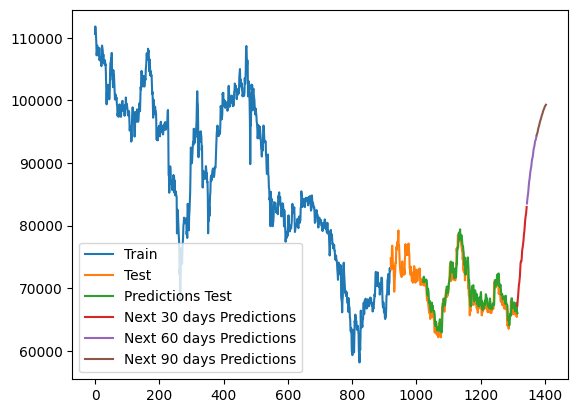

In [169]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()

<h1># 4. Split the data into training, testing arcording to 8:2

In [172]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [173]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [174]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [175]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [176]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [177]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 1s 17ms/step - loss: 0.1595
Epoch 2/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0161
Epoch 3/100
15/15 [==============================] - 0s 19ms/step - loss: 0.0078
Epoch 4/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0056
Epoch 5/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0047
Epoch 6/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0043
Epoch 7/100
15/15 [==============================] - 0s 20ms/step - loss: 0.0040
Epoch 8/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0038
Epoch 9/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0035
Epoch 10/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0034
Epoch 11/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0033
Epoch 12/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0031
Epoch 13/100
15/15 [=====

In [178]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 6ms/step


In [179]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [180]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)

Testing RMSE: 945.0072960424653
Test MAE:  723.9603491512344
Test MAPE:  1.0682120665203607


In [181]:
# 13. Dự báo 90 ngày tiếp theo

x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]

n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.16096698]
101
1 day input [0.18257135 0.17154416 0.16970474 0.15867756 0.16602964 0.15316303
 0.14948792 0.15684    0.15132548 0.15684    0.16786719 0.17338171
 0.16235267 0.15500059 0.14765037 0.14948792 0.14948792 0.14765037
 0.14948792 0.15867756 0.15684    0.16786719 0.16051511 0.16051511
 0.16051511 0.20462758 0.23954856 0.23219648 0.22852137 0.2340359
 0.22300685 0.22300685 0.24138612 0.24506309 0.24138612 0.23219648
 0.24138612 0.25976724 0.23771101 0.24138612 0.20462758 0.21014211
 0.20462758 0.21933174 0.21381722 0.19892316 0.18216735 0.18030559
 0.1840291  0.19147613 0.18030559 0.1709968  0.17844383 0.17844383
 0.17844383 0.17658207 0.16541153 0.1709968  0.15982626 0.18775262
 0.18216735 0.16541153 0.16541153 0.16168802 0.1579645  0.15982626
 0.12631463 0.10955882 0.11328233 0.11328233 0.10955882 0.10025003
 0.10955882 0.12259112 0.12817639 0.13562342 0.13934693 0.14307045
 0.1840291  0.18216735 0.1579645  0.15610275 0.14307045 0.15610275
 0.16541153 0.16913505 0.16541153 

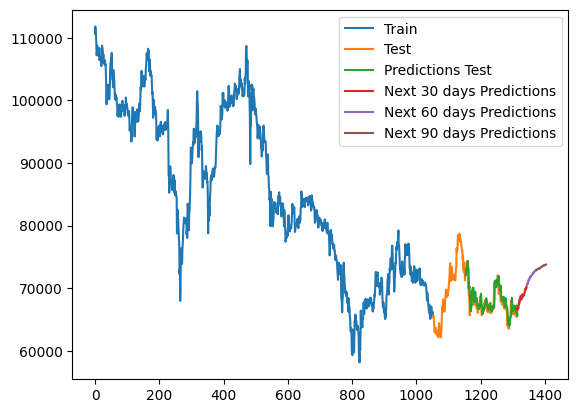

In [182]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()

<h1># 4. Split the data into training, testing arcording to 9:1

In [183]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [184]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [185]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [186]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [187]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [188]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 2s 18ms/step - loss: 0.0842
Epoch 2/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0050
Epoch 3/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0021
Epoch 4/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0015
Epoch 5/100
17/17 [==============================] - 1s 47ms/step - loss: 0.0012
Epoch 6/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0012
Epoch 7/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0011
Epoch 8/100
17/17 [==============================] - 0s 20ms/step - loss: 0.0011
Epoch 9/100
17/17 [==============================] - 0s 17ms/step - loss: 0.0011
Epoch 10/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0011
Epoch 11/100
17/17 [==============================] - 0s 21ms/step - loss: 0.0010
Epoch 12/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0010
Epoch 13/100
17/17 [=====

In [189]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 27ms/step


In [190]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [191]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
mae_test = mean_absolute_error(ytest, y_pred)
mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print("Test MAE: ", mae_test)
print("Test MAPE: ", mape_test)

Testing RMSE: 1086.6139998847975
Test MAE:  903.132686491935
Test MAPE:  1.3750769776124512


In [192]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1



[0.16974747]
101
1 day input [0.18257135 0.17154416 0.16970474 0.15867756 0.16602964 0.15316303
 0.14948792 0.15684    0.15132548 0.15684    0.16786719 0.17338171
 0.16235267 0.15500059 0.14765037 0.14948792 0.14948792 0.14765037
 0.14948792 0.15867756 0.15684    0.16786719 0.16051511 0.16051511
 0.16051511 0.20462758 0.23954856 0.23219648 0.22852137 0.2340359
 0.22300685 0.22300685 0.24138612 0.24506309 0.24138612 0.23219648
 0.24138612 0.25976724 0.23771101 0.24138612 0.20462758 0.21014211
 0.20462758 0.21933174 0.21381722 0.19892316 0.18216735 0.18030559
 0.1840291  0.19147613 0.18030559 0.1709968  0.17844383 0.17844383
 0.17844383 0.17658207 0.16541153 0.1709968  0.15982626 0.18775262
 0.18216735 0.16541153 0.16541153 0.16168802 0.1579645  0.15982626
 0.12631463 0.10955882 0.11328233 0.11328233 0.10955882 0.10025003
 0.10955882 0.12259112 0.12817639 0.13562342 0.13934693 0.14307045
 0.1840291  0.18216735 0.1579645  0.15610275 0.14307045 0.15610275
 0.16541153 0.16913505 0.16541153 

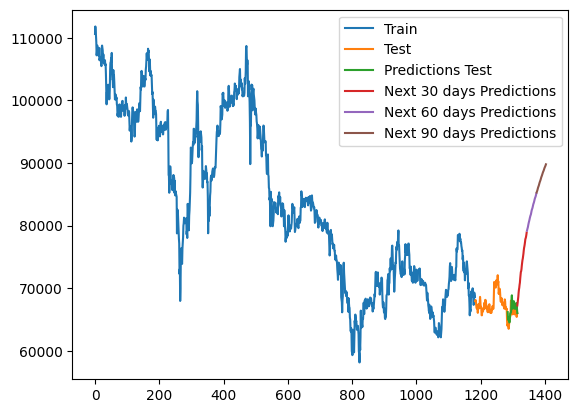

In [193]:
# 14. Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()